<a href="https://colab.research.google.com/github/pterancobo/ADS_Case_problem/blob/main/sktime_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
!pip install sktime
import sktime
from sktime.forecasting.model_selection import temporal_train_test_split
from sktime.forecasting.base import ForecastingHorizon
from sktime.forecasting.theta import ThetaForecaster
from sktime.performance_metrics.forecasting import mean_absolute_percentage_error as mape, mean_absolute_error as mae
from sktime.utils.plotting import plot_series
import pandas as pd
import flavor

!pip install mlflow
import mlflow

ModuleNotFoundError: No module named 'flavor'

In [4]:
# load data

url = 'https://github.com/pterancobo/ADS_Case_problem/blob/main/data/train.csv?raw=true'
raw_df = pd.read_csv(url).dropna()
raw_df.head()

,Unnamed: 0,y
0,01.01.15,1.91157
1,01.02.15,1.44733
2,01.03.15,1.89355
3,01.04.15,2.03274
4,01.05.15,2.27843


In [5]:
clean_df = raw_df.rename(columns={"Unnamed: 0":"date","y":"value"})

In [6]:
clean_df['date'] =  pd.to_datetime(clean_df['date'], format='%d.%m.%y')

In [7]:
clean_df['date'] = pd.PeriodIndex(clean_df['date'], freq="M")

In [ ]:
clean_df = clean_df.set_index("date")

,value
2015-01,1.91157
2015-02,1.44733
2015-03,1.89355
2015-04,2.03274
2015-05,2.27843
...,...
2020-10,2.21851
2020-11,2.01204
2020-12,1.97353
2021-01,2.19952


In [ ]:
df_train, df_test = temporal_train_test_split(clean_df, train_size = .80)

In [ ]:
fh = ForecastingHorizon(df_test.index, is_relative = False)
fh # this is the array with dates over which we will make predictions


ForecastingHorizon(['2019-12', '2020-01', '2020-02', '2020-03', '2020-04', '2020-05',
             '2020-06', '2020-07', '2020-08', '2020-09', '2020-10', '2020-11',
             '2020-12', '2021-01', '2021-02'],
            dtype='period[M]', is_relative=False)

In [ ]:
df_train.shape

(59, 1)

In [ ]:
forecaster = ThetaForecaster(sp=24) # set a monthly predictor
forecaster.fit(df_train)

ThetaForecaster(sp=24)

In [ ]:
df_pred = forecaster.predict(fh)

In [ ]:
mape(df_pred,df_test)

0.2502369866834552

(<Figure size 1600x400 with 1 Axes>, <Axes: >)

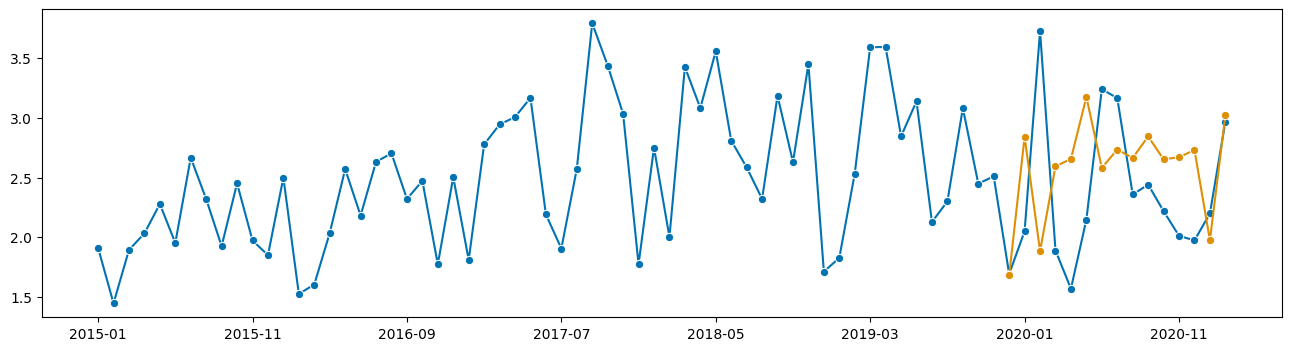

In [ ]:
plot_series(clean_df,df_pred)

In [ ]:
from sktime.forecasting.naive import NaiveForecaster
forecaster2 = NaiveForecaster(strategy = 'last', sp = 12)
forecaster2.fit(df_train,fh=fh)
df_pred2 = forecaster2.predict()

In [ ]:
plot_series(clean_df,df_pred2)

,value
2019-12,1.71206
2020-01,1.82731
2020-02,2.53307
2020-03,3.59099
2020-04,3.59265
2020-05,2.84472
2020-06,3.13841
2020-07,2.12775
2020-08,2.30048
2020-09,3.08097


In [ ]:
mape(df_pred2,df_test)

0.2307068826397583

0.2502369866834552


(<Figure size 1600x400 with 1 Axes>, <Axes: >)

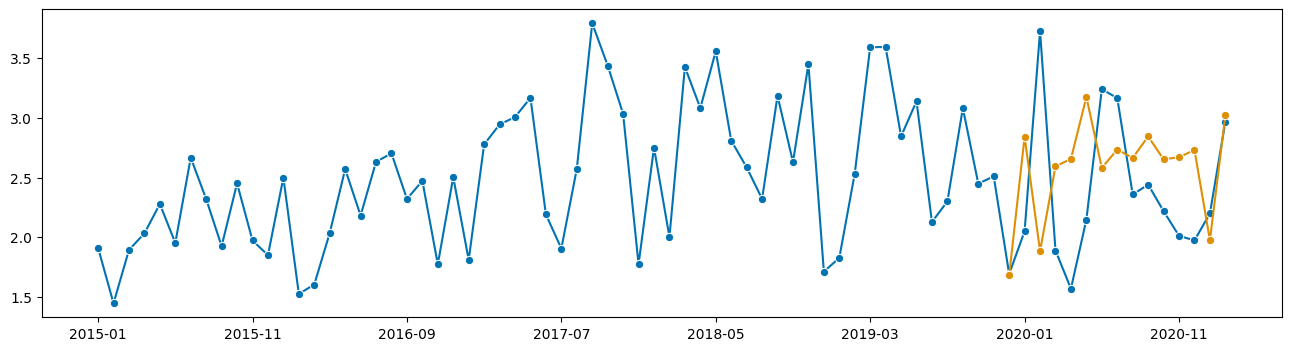

In [ ]:
from sktime.forecasting.ets import AutoETS
forecaster3 = AutoETS(auto=True)
forecaster3.fit(df_train)
df_pred3 = forecaster.predict(fh=fh)
print(mape(df_pred3,df_test))
plot_series(clean_df,df_pred3)

In [ ]:
from scipy.fftpack import fft

yf = fft(raw_df['y'].values)

array([183.07949    -0.j        , -12.54080087 +5.88785494j,
         1.32083355 +1.93539877j,   0.49794227 -0.41709741j,
        -0.69912787 +1.69424941j,  -4.38431934 +0.11835708j,
        -4.08441702 -4.2238877j ,   1.33562534 +3.85435035j,
        -0.5267548  +1.7959685j ,   5.05575845 -2.96240942j,
        -0.74253696 +0.60503279j,   2.38979852 +9.98629449j,
        -1.137678   -5.05884706j,   3.19506757+10.61224346j,
        -4.496585   -0.40868671j,  -3.67972787 -3.92865281j,
         4.06778178 -0.51137551j,   0.33823636 +0.56857565j,
         3.95312777 +6.67443359j,  -1.11893085 +4.57846316j,
        -4.90208343 +1.30765373j,  -1.25275972 -2.27967292j,
        -1.4466002  +2.74729191j,   1.63256478 +1.82473746j,
         3.62352347 +0.59973351j,   0.60722691 +2.06662877j,
        -2.02035076 -1.62206682j,  -1.38281332 -2.89370116j,
        -0.89164263 +0.60185218j,   3.14229836 +2.68109682j,
        -5.75880427 +4.02594031j,  -2.41973809 +0.25868857j,
         1.95524116 +0.5

In [ ]:
import numpy as np
N = df_train.shape[0]
T = 1
xf = np.linspace(0.0, 1.0/(2.0*T), N/2)
import matplotlib.pyplot as plt
plt.plot(xf, 2.0/N * np.abs(yf[0:N/2]))

TypeError: 'float' object cannot be interpreted as an integer

In [ ]:
x = raw_df['y'].values
y = np.sin(50.0 * 2.0*np.pi*x) + 0.5*np.sin(80.0 * 2.0*np.pi*x)
yf2 = fft(y)

array([  4.20120587-0.j        ,  -2.07040819+2.7065249j ,
        -4.66179789+1.61117544j,  -2.35999601-2.258508j  ,
        -7.6203385 -4.45711559j,   0.72226841+4.61184983j,
        -0.094545  -8.66764246j,  -3.09453096+2.57804659j,
         8.51088846+3.71201992j,  -6.71427028+3.33204566j,
         7.8214532 +2.60359277j,   6.4639905 +4.78530231j,
        12.21171508-0.70039782j,  -1.55827472-0.37135588j,
        -2.84228797-3.24707027j,  -5.13355466+7.67998686j,
         8.6936948 -0.093087j  ,   2.35852065-0.9191537j ,
         1.79107652+1.6706376j ,  -1.5135952 +3.260967j  ,
        -2.02733086-1.90797655j,  -9.18080656+4.62743926j,
        -0.81154477-0.20304599j,   3.73258297-5.11356482j,
       -11.7258359 -0.25676426j,   0.40326733+1.73572435j,
         3.73710489+4.49728553j,   2.63759479-3.72689877j,
         0.13346927-4.95103794j,  -3.93026076-0.46423168j,
        -7.18062123+0.41439045j,  -7.70175875+6.95018616j,
        -4.61490799+3.50062526j,  -9.44208408-8.77266997

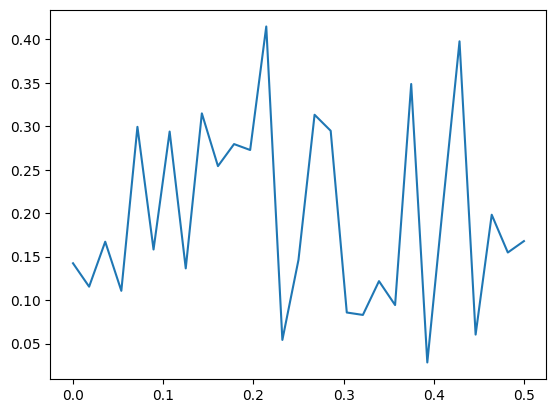

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy.fftpack


y = np.sin(50.0 * 2.0*np.pi*x) + 0.5*np.sin(80.0 * 2.0*np.pi*x)
yf = scipy.fftpack.fft(y)
xf = np.linspace(0.0, 1.0/(2.0*T), N//2)

fig, ax = plt.subplots()
ax.plot(xf, 2.0/N * np.abs(yf[:N//2]))
plt.show()

In [15]:
mlflow ui

SyntaxError: invalid syntax (<ipython-input-15-9ad9f874b0b2>, line 1)

In [14]:
# set the experiment id
mlflow.set_tracking_uri("http://localhost:5001")
experiment_name = "sktime_test"
try:
    mlflow.create_experiment(experiment_name)
except:
    print("experiment exists")

mlflow.set_experiment(experiment_name)

mlflow.sklearn.autolog(disable_for_unsupported_versions=True)

KeyboardInterrupt: 